In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib
# Numpy options
np.random.seed(78)
# Pandas options
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 400)
# Matplotlib options
matplotlib.rcParams['image.cmap'] = 'viridis'
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10,6)

In [26]:
df = pd.read_excel(open('USFoodCommodity.xls','rb'), sheetname='94-98 FAH')
df_men = pd.concat((df[107:116], df[77:90]))
for i in range(1,16):
    if i != 7:
        df_men = df_men.drop('Unnamed: ' + str(i), 1)
        i+1
df_men.columns=['Food','94-98']
df_men = df_men.reset_index(drop=True)
df_men = df_men.drop(df_men.index[1:5])
df_men = df_men.reset_index(drop=True)
df_men = df_men.drop(df_men.index[6:8])
df_men = df_men.reset_index(drop=True)
df_men = df_men.drop(df_men.index[11:13])
df_men = df_men.reset_index(drop=True)
#df_men = df_men.drop('Food',1)
#df_men=df_men.join(df_men)









In [28]:
df_men_final = df_men

In [29]:
df_men_final

,Food,94-98
0,"Fluid milk, Total",82.57
1,Butter,65.97
2,Cheese,57.47
3,Yogurt,89.68
4,"Dairy, Other",66.56
5,"Apples, Total",89.01
6,Bananas,95.42
7,Berries,84.21
8,Grapes,88.79
9,Melons,80.74


In [30]:
df = pd.read_excel(open('USFoodCommodity.xls','rb'), sheetname='07-08 FAH')
df_men = pd.concat((df[107:116], df[77:90]))
for i in range(1,16):
    if i != 7:
        df_men = df_men.drop('Unnamed: ' + str(i), 1)
        i+1
df_men.columns=['Food','07-08']
df_men = df_men.reset_index(drop=True)
df_men = df_men.drop(df_men.index[1:5])
df_men = df_men.reset_index(drop=True)
df_men = df_men.drop(df_men.index[6:8])
df_men = df_men.reset_index(drop=True)
df_men = df_men.drop(df_men.index[11:13])
df_men = df_men.reset_index(drop=True)
df_men = df_men.drop('Food',1)
df_men_final=df_men_final.join(df_men)











In [31]:
df_men_final

,Food,94-98,07-08
0,"Fluid milk, Total",82.57,87.86
1,Butter,65.97,74.37
2,Cheese,57.47,55.2
3,Yogurt,89.68,88.52
4,"Dairy, Other",66.56,69.87
5,"Apples, Total",89.01,92.81
6,Bananas,95.42,93.96
7,Berries,84.21,90.7
8,Grapes,88.79,92.16
9,Melons,80.74,84.97


In [77]:
df_men_final.columns=['Food','94-98','07-08']

In [48]:
df_men_final['% change'] = df_men_final.range1.pct_change()

In [74]:
df_men_final = df_men_final.drop('%change',1)

In [80]:
df_men_final

,Food,94-98,07-08
0,"Fluid milk, Total",82.57,87.86
1,Butter,65.97,74.37
2,Cheese,57.47,55.2
3,Yogurt,89.68,88.52
4,"Dairy, Other",66.56,69.87
5,"Apples, Total",89.01,92.81
6,Bananas,95.42,93.96
7,Berries,84.21,90.7
8,Grapes,88.79,92.16
9,Melons,80.74,84.97


In [81]:
df_men_final['%change'] = ((df_men_final['94-98'] - df_men_final['07-08'])/df_men_final['94-98'])*100

In [132]:
df_men_final['Type']=['Dairy','Dairy','Dairy','Dairy','Dairy','Fruit','Fruit','Fruit','Fruit','Fruit','Fruit','Fruit','Fruit','Fruit']

In [149]:
df_men_final = df_men_final.sort_values(by=['Type','%change'])

In [152]:
df_men_final = df_men_final.reset_index(drop=True)

In [153]:
df_men_final

,Food,94-98,07-08,%change,Type
0,Butter,65.97,74.37,-12.7331,Dairy
1,"Fluid milk, Total",82.57,87.86,-6.40669,Dairy
2,"Dairy, Other",66.56,69.87,-4.97296,Dairy
3,Yogurt,89.68,88.52,1.29349,Dairy
4,Cheese,57.47,55.2,3.94989,Dairy
5,Tropical fruit,74.61,84.68,-13.4969,Fruit
6,Stone fruit,88.95,95.89,-7.80214,Fruit
7,Berries,84.21,90.7,-7.70692,Fruit
8,Melons,80.74,84.97,-5.23904,Fruit
9,"Apples, Total",89.01,92.81,-4.26918,Fruit


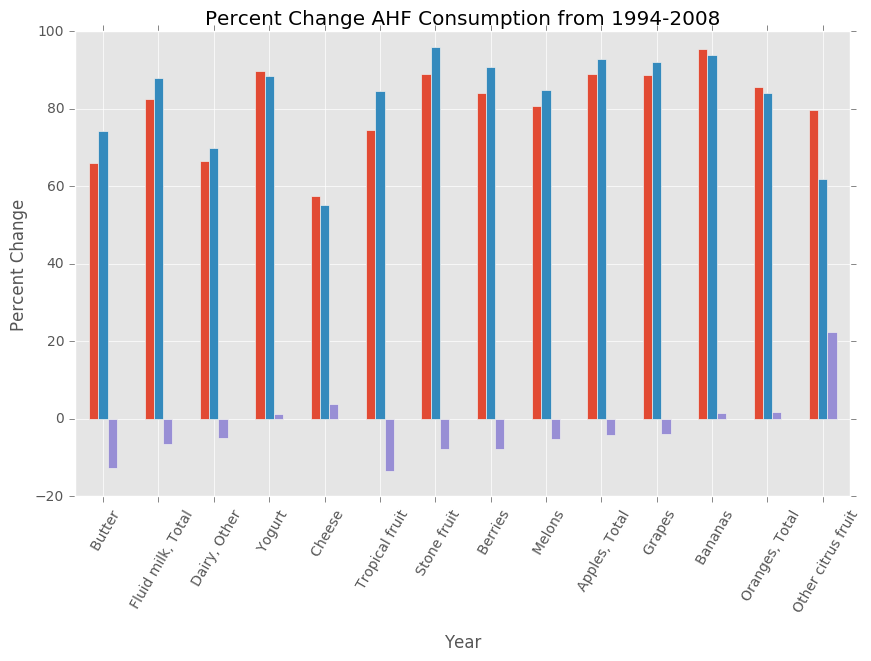

In [154]:
df_men_final.plot.bar(x='Food',rot=60, legend=False)
plt.ylabel('Percent Change')
plt.xlabel('Year')
plt.title('Percent Change AHF Consumption from 1994-2008')
#plt.text(0, -60, 'Commodity Availability by Food Source, 1994-2008 https://www.ers.usda.gov/publications/pub-details/?pubid=81817\nData: https://www.ers.usda.gov/webdocs/publications/err221/appendix%20b%20(shares).xls?v=42725')


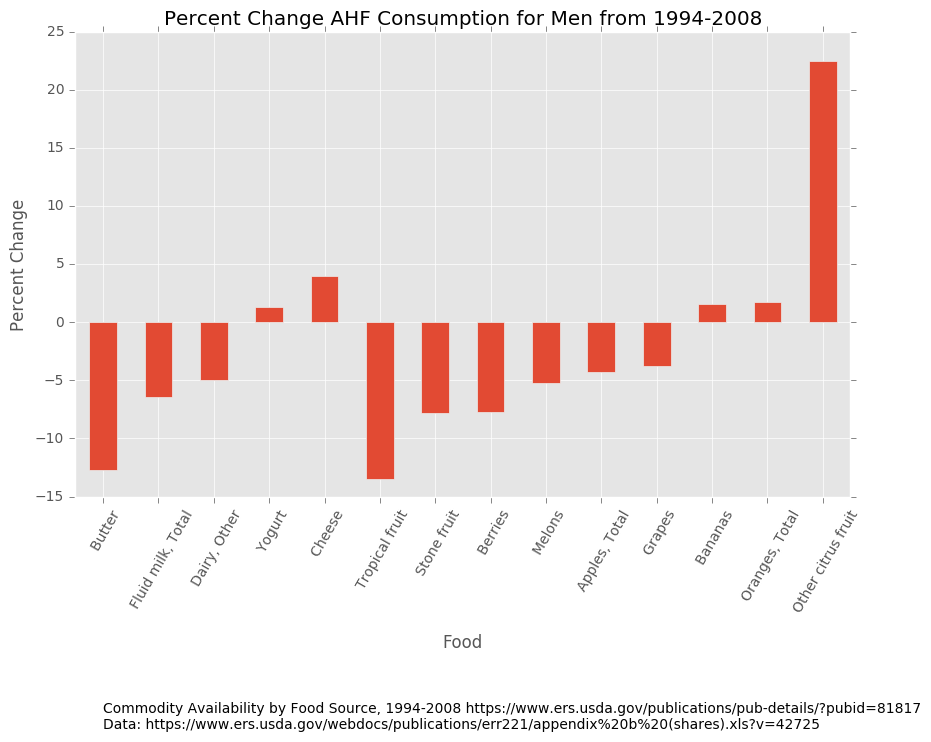

In [192]:
df_men_final.plot.bar(x='Food',y='%change',rot=60, legend=False)
plt.ylabel('Percent Change')
plt.xlabel('Food')
plt.title('Percent Change AHF Consumption for Men from 1994-2008')
plt.text(0, -35, 'Commodity Availability by Food Source, 1994-2008 https://www.ers.usda.gov/publications/pub-details/?pubid=81817\nData: https://www.ers.usda.gov/webdocs/publications/err221/appendix%20b%20(shares).xls?v=42725')



In [174]:
df_women_final = df_women

In [175]:
df = pd.read_excel(open('USFoodCommodity.xls','rb'), sheetname='07-08 FAH')
df_women = pd.concat((df[107:116], df[77:90]))
for i in range(1,16):
    if i != 10:
        df_women = df_women.drop('Unnamed: ' + str(i), 1)
        i+1
df_women.columns=['Food','07-08']
df_women = df_women.reset_index(drop=True)
df_women = df_women.drop(df_women.index[1:5])
df_women = df_women.reset_index(drop=True)
df_women = df_women.drop(df_women.index[6:8])
df_women = df_women.reset_index(drop=True)
df_women = df_women.drop(df_women.index[11:13])
df_women = df_women.reset_index(drop=True)
df_women = df_women.drop('Food',1)
df_women_final=df_women_final.join(df_women)











In [173]:
df_women

,Food,94-98
0,"Fluid milk, Total",86.69
1,Butter,70.66
2,Cheese,62.24
3,Yogurt,88.22
4,"Dairy, Other",65.48
5,"Apples, Total",89.66
6,Bananas,94.18
7,Berries,81.73
8,Grapes,88.13
9,Melons,84.96


In [176]:
df_women_final

,Food,94-98,07-08
0,"Fluid milk, Total",86.69,88.38
1,Butter,70.66,76.82
2,Cheese,62.24,62.24
3,Yogurt,88.22,92.56
4,"Dairy, Other",65.48,72.39
5,"Apples, Total",89.66,90.24
6,Bananas,94.18,94.2
7,Berries,81.73,87.99
8,Grapes,88.13,90.02
9,Melons,84.96,85.48


In [177]:
df_women_final['%change'] = ((df_women_final['94-98'] - df_women_final['07-08'])/df_women_final['94-98'])*100

In [184]:
df_women_final['Type']=['Dairy','Dairy','Dairy','Dairy','Dairy','Fruit','Fruit','Fruit','Fruit','Fruit','Fruit','Fruit','Fruit','Fruit']

In [185]:
df_women_final

,Food,94-98,07-08,%change,Type
0,"Fluid milk, Total",86.69,88.38,-1.94948,Dairy
1,Butter,70.66,76.82,-8.7178,Dairy
2,Cheese,62.24,62.24,0,Dairy
3,Yogurt,88.22,92.56,-4.91952,Dairy
4,"Dairy, Other",65.48,72.39,-10.5528,Dairy
5,"Apples, Total",89.66,90.24,-0.646888,Fruit
6,Bananas,94.18,94.2,-0.0212359,Fruit
7,Berries,81.73,87.99,-7.65937,Fruit
8,Grapes,88.13,90.02,-2.14456,Fruit
9,Melons,84.96,85.48,-0.612053,Fruit


In [186]:
df_women_final = df_women_final.sort_values(by=['Type','%change'])

In [187]:
df_women_final

,Food,94-98,07-08,%change,Type
4,"Dairy, Other",65.48,72.39,-10.5528,Dairy
1,Butter,70.66,76.82,-8.7178,Dairy
3,Yogurt,88.22,92.56,-4.91952,Dairy
0,"Fluid milk, Total",86.69,88.38,-1.94948,Dairy
2,Cheese,62.24,62.24,0,Dairy
7,Berries,81.73,87.99,-7.65937,Fruit
12,Stone fruit,89.55,94.3,-5.3043,Fruit
8,Grapes,88.13,90.02,-2.14456,Fruit
5,"Apples, Total",89.66,90.24,-0.646888,Fruit
9,Melons,84.96,85.48,-0.612053,Fruit


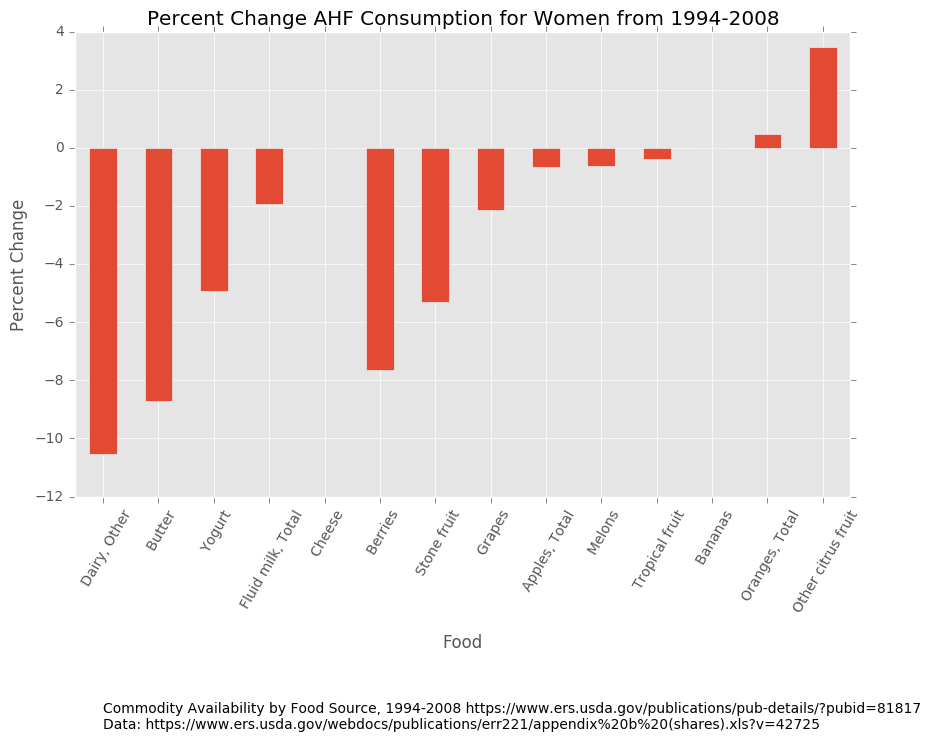

In [191]:
df_women_final.plot.bar(x='Food',y='%change',rot=60, legend=False)
plt.ylabel('Percent Change')
plt.xlabel('Food')
plt.title('Percent Change AHF Consumption for Women from 1994-2008')
plt.text(0, -20, 'Commodity Availability by Food Source, 1994-2008 https://www.ers.usda.gov/publications/pub-details/?pubid=81817\nData: https://www.ers.usda.gov/webdocs/publications/err221/appendix%20b%20(shares).xls?v=42725')


